In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.cluster
import geopandas as gpd
from sklearn.cluster import k_means
import seaborn as sns; sns.set()
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans2
import pylab as pl

### Kmeans

In [86]:
data = pd.read_csv('cpw_stops_2012.csv')
data.dtypes

day             object
month           object
time.period      int64
lat            float64
lon            float64
dtype: object

In [87]:
for elem in ['day','month']:
    

    unique_list = list(set(data[elem]))
    days_dict = dict(zip(unique_list,range(len(unique_list))))
    data[elem] = map(lambda x:days_dict[x],data[elem])

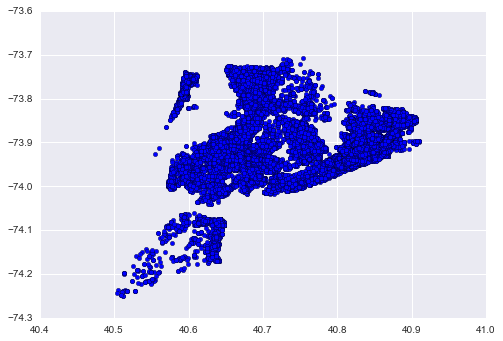

In [88]:
plt.scatter(data.lat,data.lon)
plt.show()

In [89]:
est = k_means(data,n_clusters = 5)

In [90]:
coordinates = data.as_matrix(columns=['lon', 'lat'])
w = whiten(coordinates)

In [91]:
print coordinates.mean(axis=0), w.mean(axis=0)
print coordinates.std(axis=0), w.std(axis=0)

[-73.90968715  40.75002647] [-1169.16032722   466.14606036]
[ 0.06321604  0.08741901] [ 1.  1.]


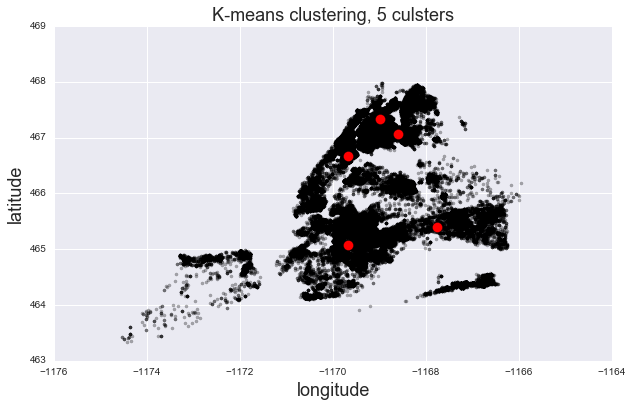

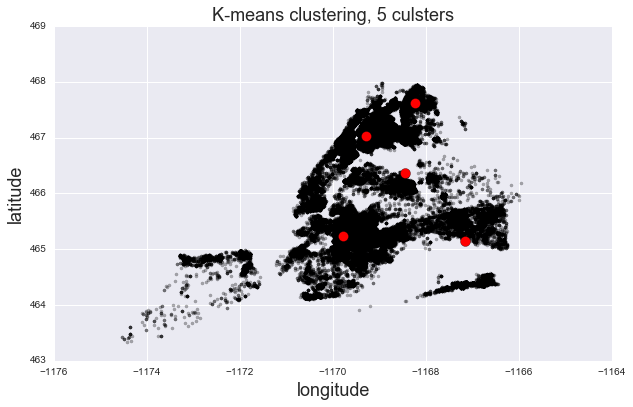

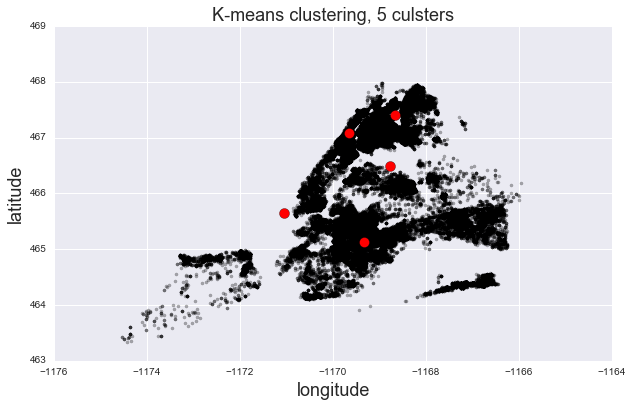

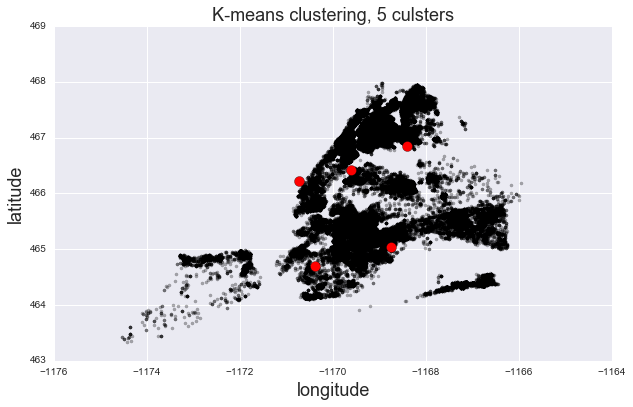

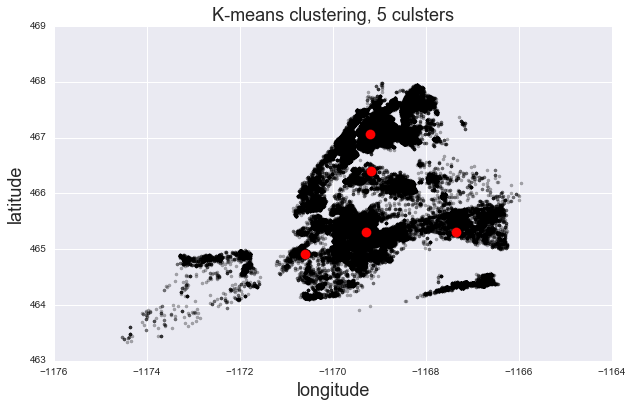

In [92]:
nk= 5
for i in range(5):
    cluster_centroids, closest_centroids = kmeans2(w, nk, iter=1)
    pl.figure(figsize=(10, 6))
    
    pl.scatter(w[:,0], w[:,1], c='k', alpha=.3, s=10)
    pl.scatter(cluster_centroids[:,0], cluster_centroids[:,1], c='r', s=100)
    pl.xlabel("longitude", fontsize=18)
    pl.ylabel("latitude", fontsize=18)
    pl.title("K-means clustering, %d culsters"%nk, fontsize=18)

The iterations were run for 5 times, as kmeans2 has a random initailization of centers,and the cluster size was taken 5 to see if it falls around each of the borough (if it does!), meaning each has its own patterns. From the data though we see that points are strongly clustered around Brooklyn and Southern Bronx for sure. 

#### Birch Algorithm

I used Birch Algorith the next, as the dataset is really large (= 123439),and Birch usually takes a single scan at the dataset for unsupervised learning, and is more useful for large dataset. 
The Birch clustering was performed with branching factor = 50, as with the relative size of the data, splitting in the range of 50-60, we get points covering the whole of NYC map. I did not use clustering number as I wanted it to cluster it on its own. 
Also the three maps with varying colors are to see how features are distributed along the cluster, as visualizing cluster size
was not feasible for this problem

In [93]:
X = np.array(data)

In [94]:
import sklearn.cluster

In [95]:
brc = sklearn.cluster.Birch(branching_factor=50, n_clusters=None, threshold=0.1,compute_labels=True)
brc.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.1)

In [96]:
len(set(brc.labels_))

1430

In [97]:
data['cluster2'] = brc.labels_

In [98]:
cluster_centroids = brc.subcluster_centers_


In [99]:
data

,day,month,time.period,lat,lon,cluster2
0,4,5,6,40.829234,-73.875506,41
1,6,5,1,40.812185,-73.938034,1366
2,5,5,1,40.840865,-73.885549,1367
3,5,5,1,40.577244,-74.000032,1368
4,1,5,5,40.834126,-73.916660,361
5,3,5,6,40.646686,-73.954127,43
6,4,5,5,40.657282,-73.928054,44
7,2,5,6,40.833315,-73.926371,45
8,6,5,1,40.727090,-73.976639,1370
9,6,5,5,40.839552,-73.915942,46


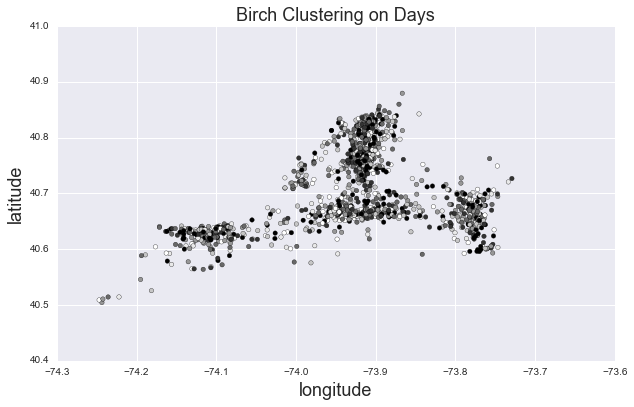

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(cluster_centroids[:,4],cluster_centroids[:,3],c=cluster_centroids[:,0])
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Birch Clustering on Days", fontsize=18)

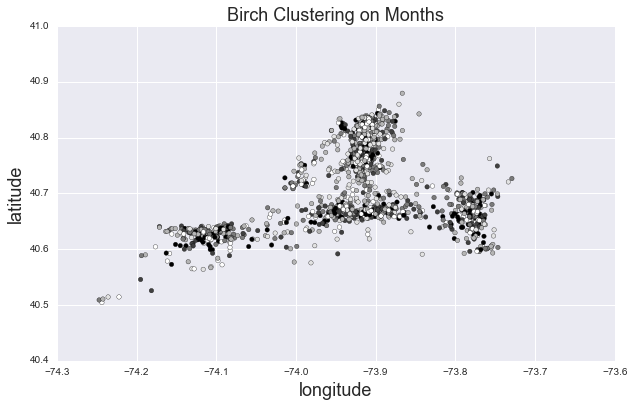

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(cluster_centroids[:,4],cluster_centroids[:,3],c=cluster_centroids[:,2])
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Birch Clustering on Months", fontsize=18)

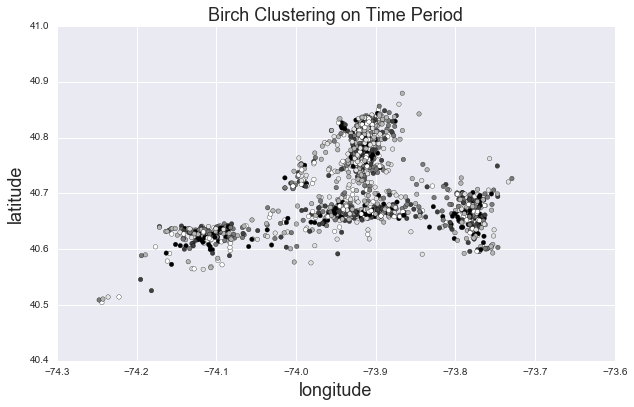

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(cluster_centroids[:,4],cluster_centroids[:,3],c=cluster_centroids[:,2])
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Birch Clustering on Time Period", fontsize=18)

### Affinity Propagation

I was interested in seeing how afffinity propagation performed on the datast, but even while fitting/predicting the data, the
algorithm almost crashed as the data is really large (= 123439)

In [103]:
subdata = data.sample(1234)

In [104]:
len(subdata)
X = np.array(subdata)

In [105]:
from sklearn.cluster import AffinityPropagation

In [106]:
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [107]:
subdata['cluster'] = labels

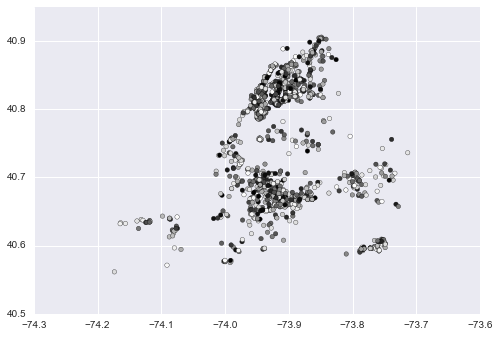

In [108]:
plt.scatter(subdata['lon'],subdata['lat'],c = labels)

The visualization for this is mostly futile as the data is incomplete.